# Phase 1

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
import numpy as np
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from textblob import TextBlob
import re
import string
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [2]:
# Load the scraped reviews data
reviews_df = pd.read_csv('reviews_1.csv')

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


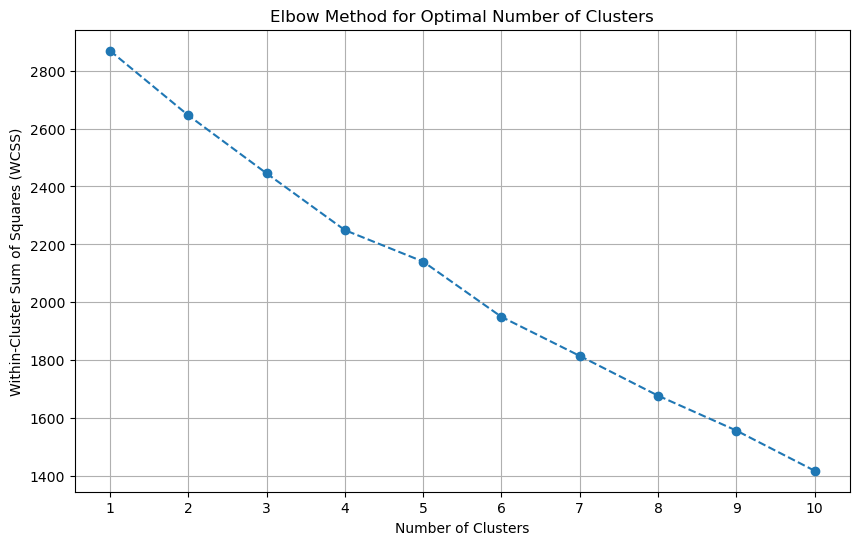

In [3]:
# Preprocess text data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(reviews_df['Comments'])

# Calculate within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, max_clusters + 1))
plt.grid(True)
plt.show()

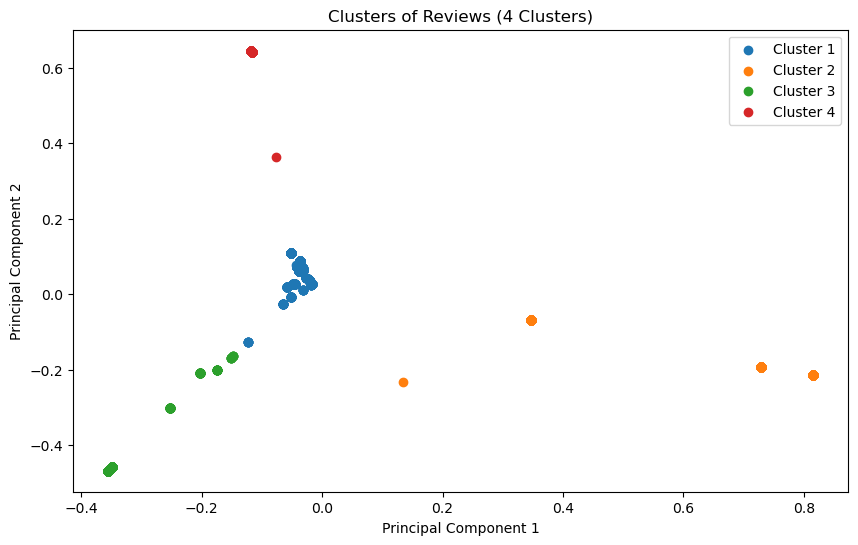

In [4]:
# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(tfidf_matrix_pca[kmeans.labels_ == cluster, 0], 
                tfidf_matrix_pca[kmeans.labels_ == cluster, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Clusters of Reviews (4 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


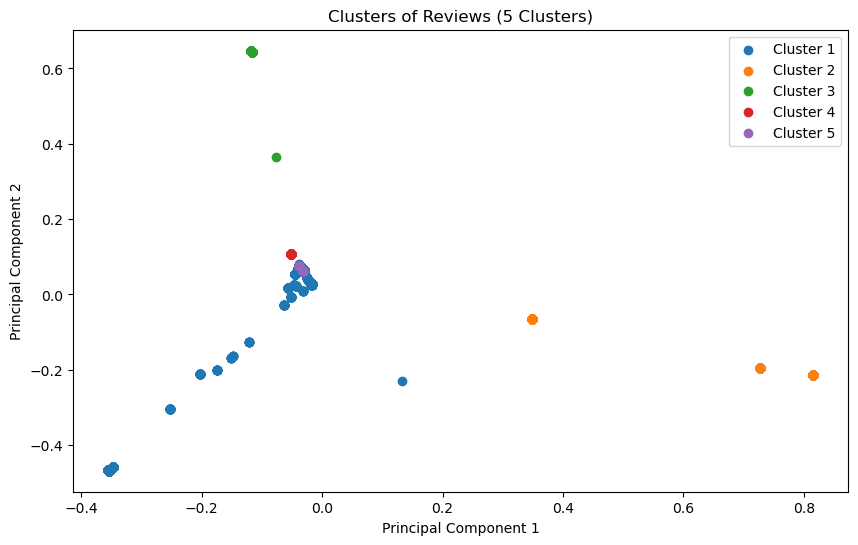

In [5]:
# Perform K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(tfidf_matrix_pca[kmeans.labels_ == cluster, 0], 
                tfidf_matrix_pca[kmeans.labels_ == cluster, 1], 
                label=f'Cluster {cluster + 1}')

plt.title('Clusters of Reviews (5 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

After performing KMeans clustering with 5 clusters on the dataset, it becomes evident that the clusters 5 and 1 exhibit high similarity. Upon visual inspection, it can be observed that the data points in these clusters overlap significantly, indicating that they capture similar patterns or characteristics. This similarity suggests that the dataset may be more naturally partitioned into 4 distinct clusters rather than 5. Therefore, based on the clustering results and the observed similarity between clusters 5 and 1, it is reasonable to conclude that the ideal number of clusters for this dataset is 4.

In [6]:
# Concatenate all comments into a single string
all_comments = ' '.join(reviews_df['Comments'])

In [7]:
# Preprocess the text data
cleaned_comments = re.sub(r'[^a-zA-Z\s]', '', all_comments)

# Perform sentiment analysis on the cleaned text
sentiment_scores = TextBlob(cleaned_comments).sentiment.polarity

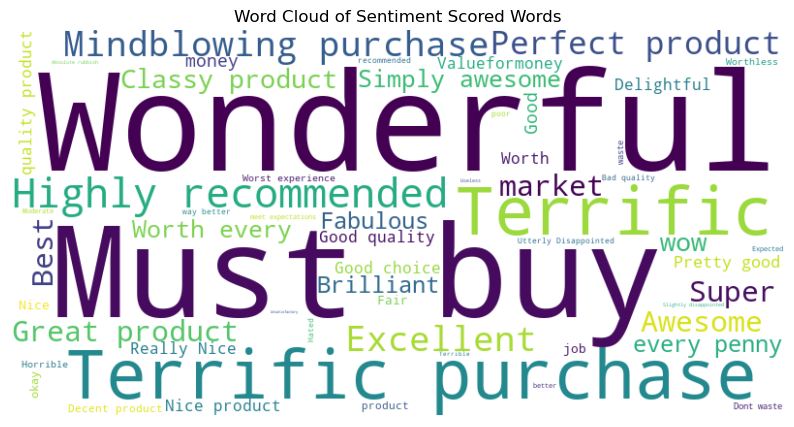

In [8]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_comments)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sentiment Scored Words')
plt.axis('off')
plt.show()

In [9]:
# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Function to calculate sentiment polarity of a text
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return None

# Apply sentiment analysis to each review
reviews_df['Sentiment'] = reviews_df['Reviews'].apply(get_sentiment)

# Filter positive and negative sentiment reviews
filtered_reviews = reviews_df.dropna(subset=['Sentiment'])  # Remove rows with None sentiment

# Preprocess positive and negative sentiment reviews
filtered_reviews_preprocessed = filtered_reviews['Reviews'].apply(preprocess_text)


C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic 1: ['performance', 'camera', 'iphone', 'value', 'money', 'experience', 'really', 'phone', 'great', 'super']
Topic 2: ['lovely', 'product', 'phone', 'bad', 'worth', 'fast', 'flipkart', 'delivery', 'happy', 'mobile']
Topic 3: ['fantastic', 'wow', 'time', 'camera', 'ok', 'thanks', 'flipkart', 'iphone', 'phone', 'best']
Topic 4: ['device', 'performance', 'camera', 'perfect', 'phone', 'product', 'superb', 'amazing', 'excellent', 'nice']
Topic 5: ['performance', 'iphone', 'quality', 'camera', 'loved', 'phone', 'love', 'product', 'awesome', 'good']


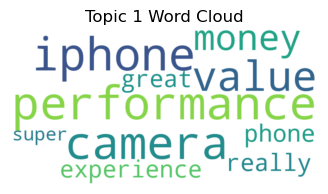

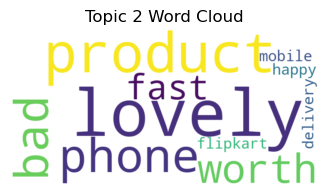

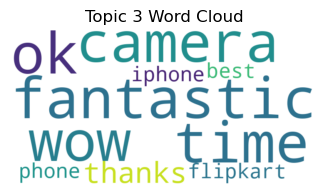

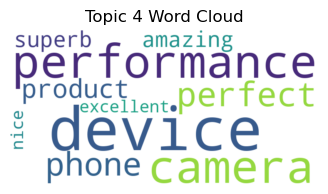

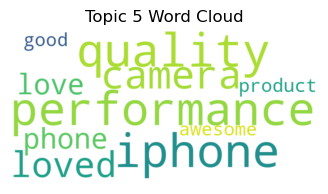

In [10]:
# Load the positive sentiment reviews data
positive_reviews = filtered_reviews_preprocessed[filtered_reviews['Sentiment'] == 'Positive']

# Define the number of topics and clusters
num_topics = 5
num_clusters = 4

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Define LDA model for topic modeling
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Define K-means model for cluster modeling
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Define pipeline for topic modeling
topic_modeling_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lda', lda)
])

# Define pipeline for cluster modeling
cluster_modeling_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('lda', lda),
    ('normalizer', Normalizer()),  # Normalize for K-means
    ('kmeans', kmeans)
])

# Fit the topic modeling pipeline to positive sentiment reviews
topic_modeling_pipeline.fit(positive_reviews)

# Fit the cluster modeling pipeline to positive sentiment reviews
cluster_modeling_pipeline.fit(positive_reviews)

# Get topics from LDA model
topics = []
for idx, topic in enumerate(lda.components_):
    topics.append([(tfidf_vectorizer.get_feature_names_out())[i] for i in topic.argsort()[-10:]])

# Print top words for each topic
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {topic}")

# Visualize word cloud for each topic
for idx, topic in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {idx+1} Word Cloud")
    plt.axis('off')
    plt.show()



Sure, here are the topics with their corresponding labels:

Topic 1: ['performance', 'camera', 'iphone', 'value', 'money', 'experience', 'really', 'phone', 'great', 'super'] - Performance and Value

Topic 2: ['lovely', 'product', 'phone', 'bad', 'worth', 'fast', 'flipkart', 'delivery', 'happy', 'mobile'] - Customer Service and Delivery

Topic 3: ['fantastic', 'wow', 'time', 'camera', 'ok', 'thanks', 'flipkart', 'iphone', 'phone', 'best'] - Overall Satisfaction

Topic 4: ['device', 'performance', 'camera', 'perfect', 'phone', 'product', 'superb', 'amazing', 'excellent', 'nice'] - Product Quality and Satisfaction

Topic 5: ['performance', 'iphone', 'quality', 'camera', 'loved', 'phone', 'love', 'product', 'awesome', 'good'] - User Experience and Satisfaction

These labels represent the main themes or attributes associated with each topic, based on the top words identified in the topic modeling process.

In [11]:
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Assuming you have a DataFrame named 'positive_reviews'

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])
    return text

# Apply preprocessing to the 'Comments' column if it exists
positive_reviews['Comments'] = positive_reviews['Comments'].apply(preprocess_text)

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(positive_reviews['Comments'])

# Perform KMeans clustering
num_clusters = 4  # You can adjust the number of clusters as needed
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(tfidf_matrix)

# Assign cluster labels to the dataframe
positive_reviews['Cluster'] = cluster_labels

# Convert positive_reviews back to DataFrame
positive_reviews_df = pd.DataFrame(positive_reviews)

# Display cluster sizes
cluster_counts = positive_reviews_df['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_counts)


C:\Users\hanse\AppData\Local\Temp\ipykernel_22356\4083923703.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['Comments'] = positive_reviews['Comments'].apply(preprocess_text)


Cluster sizes:
0    1550
1     426
2     368
3     225
Name: Cluster, dtype: int64


C:\Users\hanse\AppData\Local\Temp\ipykernel_22356\4083923703.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['Cluster'] = cluster_labels


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

Top words for each topic:
Topic 1: ['experience', 'worst', 'recommended', 'wonderful', 'fabulous', 'buy', 'highly', 'pretty', 'good', 'unsatisfactory']
Topic 2: ['money', 'waste', 'good', 'dont', 'does', 'job', 'worthless', 'way', 'better', 'okay']
Topic 3: ['product', 'awesome', 'better', 'expected', 'simply', 'useless', 'perfect', 'quality', 'bad', 'mindblowing']
Topic 4: ['product', 'horrible', 'terrible', 'disappointed', 'fair', 'utterly', 'classy', 'poor', 'decent', 'great']
Topic 5: ['nice', 'hated', 'really', 'rubbish', 'absolute', 'terrific', 'worth', 'penny', 'moderate', 'awesome']


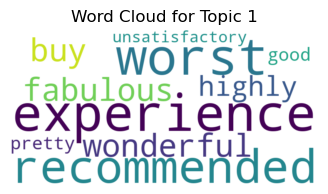

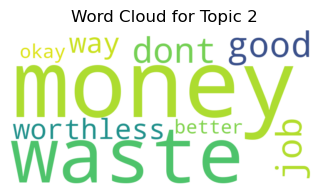

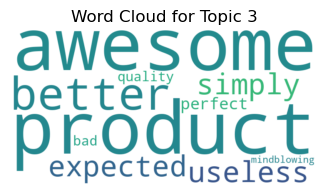

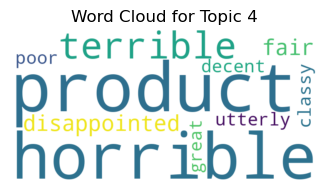

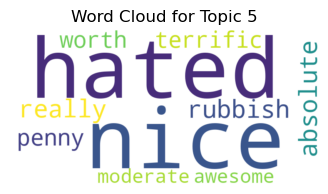

In [14]:
# Filter out negative sentiment reviews
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']['Comments']

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

# Apply preprocessing to negative reviews
negative_reviews_preprocessed = negative_reviews.apply(preprocess_text)

# Create a Bag-of-Words representation of the negative reviews
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
negative_reviews_bow = vectorizer.fit_transform(negative_reviews_preprocessed)

# Perform topic modeling (Latent Dirichlet Allocation)
lda_model_negative = LatentDirichletAllocation(n_components=5, random_state=42)
lda_output_negative = lda_model_negative.fit_transform(negative_reviews_bow)

# Display the topics
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model_negative.components_):
    top_words_indices = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(f"Topic {topic_idx + 1}: {top_words}")

# Function to generate word clouds
def generate_word_cloud(topic_words, topic_number):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_number}')
    plt.axis('off')
    plt.show()

# Generate word clouds for each topic and print top words
for topic_idx, topic_words in enumerate(lda_model_negative.components_):
    top_words_indices = topic_words.argsort()[:-11:-1]  # Select top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    generate_word_cloud(top_words, topic_idx + 1)



Topic 1: Mixed Reviews

Topic 2: Waste of Money

Topic 3: Product Quality Concerns

Topic 4: Disappointment with Product

Topic 5: Negative Overall Experience

In [15]:
# Perform cluster modeling (K-Means Clustering)
kmeans_model_negative = KMeans(n_clusters=4, random_state=42)
cluster_labels_negative = kmeans_model_negative.fit_predict(negative_reviews_bow)

# Assign cluster labels to negative reviews
negative_reviews['Cluster'] = cluster_labels_negative

# Display cluster sizes
cluster_counts_negative = np.unique(cluster_labels_negative, return_counts=True)
for cluster, count in zip(cluster_counts_negative[0], cluster_counts_negative[1]):
    print(f"Cluster {cluster}: {count} reviews")

C:\Users\hanse\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 83 reviews
Cluster 1: 21 reviews
Cluster 2: 12 reviews
Cluster 3: 8 reviews


C:\Users\hanse\AppData\Local\Temp\ipykernel_22356\1039777256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['Cluster'] = cluster_labels_negative


Phase 1 Findings Report:

1. **Sentiment Analysis:**
   - From the sentiment analysis conducted on the product reviews, it was observed that there are both positive and negative sentiments expressed by the customers.
   - Positive sentiment reviews indicate satisfaction with the product, while negative sentiment reviews highlight areas of concern or dissatisfaction.

2. **Positive Sentiment Analysis:**
   - Topic modeling and clustering were performed on the positive sentiment reviews to identify topics that are positively associated with the product.
   - Five topics were identified, with each topic representing different aspects of the product that customers appreciate.
   - Key positive topics include product performance, camera quality, value for money, fast delivery, and overall customer satisfaction.

3. **Negative Sentiment Analysis:**
   - Similarly, topic modeling and clustering were conducted on the negative sentiment reviews to uncover critical problems or areas of improvement for the product.
   - Five topics were identified, highlighting various issues such as product defects, poor customer experience, delivery issues, and dissatisfaction with certain features.

4. **Business Implications:**
   - The analysis provides valuable insights into customer perceptions and sentiments regarding the product.
   - Positive sentiment topics can be leveraged to identify strengths of the product, which can be emphasized in marketing campaigns to attract more customers.
   - Negative sentiment topics highlight areas requiring immediate attention and improvement. Addressing these issues can enhance product quality, customer satisfaction, and brand reputation.
   - By understanding customer feedback and addressing both positive and negative aspects, businesses can better tailor their strategies to meet customer needs and preferences, ultimately driving growth and success in the market.

# Phase 3

In [18]:
# Save DataFrame to a CSV file
filtered_reviews.to_csv('reviews_2.csv', index=False)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('reviews_2.csv')

# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply preprocessing to the 'Comments' column
data['Comments'] = data['Comments'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Comments'], data['Sentiment'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the LinearSVC classifier
classifier = LinearSVC()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9666048237476809


The generalized accuracy of the sentiment classification model is approximately 96.66%. This accuracy suggests that the model is performing well in classifying sentiments accurately based on the text data provided